# Which city would you like to live in?

***Created by City Fynders***

## 1. Import data

In [1]:
import pandas as pd
import numpy as np

import data_processing as dp

In [2]:
(natural, human, economy, tertiary) = dp.read_data()

## 2. Add ranks in the DataFrame

Example for getting ranks

In [3]:
#natural

natural['Air'] = natural['Air'].rank(ascending=0)
natural['Water_quality'] = natural['Water_quality'].rank(ascending=0)
natural['Toxics'] = natural['Toxics'].rank(ascending=0)
natural['Hazardous'] = natural['Hazardous'].rank(ascending=0)
natural['Green_score_rank'] = natural['Green_score'].rank(ascending=1)
natural['Green_score_rank'].fillna(natural['Green_score_rank'].max()+1, inplace=True)
natural['Sanitation'].fillna(natural['Sanitation'].max()+1, inplace=True)

natural['Natural_total_score'] = (natural['Air'] + natural['Water_quality'] + natural['Toxics'] 
                                  + natural['Hazardous'] + natural['Green_score_rank'])
natural['Natural_total_rank'] = natural['Natural_total_score'].rank(ascending=1)

In [4]:
(natural, human, economy, tertiary) = dp.data_rank(natural, human, economy, tertiary)

## 3. Get location information 

In [5]:
import geopy as gy
from geopy.geocoders import Nominatim

def find_loc(dataframe):
    geolocator = Nominatim()
    lat = []
    lon = []
    for index, row in dataframe.iterrows():
        loc = geolocator.geocode(row['City'] + ' ' + row['State'] + ' United States')
        lat.append(loc.latitude)
        lon.append(loc.longitude)
    return lat, lon

(Lat, Lon) = find_loc(human)

## 4. Create a rank DataFrame and save as `csv` file 

In [6]:
rank = dp.create_rank(natural, human, economy, tertiary, Lat, Lon)

### 5. Plot using `plotly` package

In [7]:
from plotly_usmap import usmap

usmap(rank)

'file://C:\\Users\\zhang\\Documents\\cse583\\project\\uwseds-group-city-fynders\\cityfynders\\general-ranking-map.html'

In [8]:
usmap(rank, 'natural')

'file://C:\\Users\\zhang\\Documents\\cse583\\project\\uwseds-group-city-fynders\\cityfynders\\natural-ranking-map.html'

In [9]:
import plotly
import plotly.plotly as py


# human related rank
df = rank
df = df.sort_values('Human_related_rank', ascending=1)
df['reverse_rank'] = df['Human_related_rank'].rank(ascending=0)

df['text'] = df['City'] + '<br># Final Rank ' + (df['Human_related_rank']).astype(str) +\
        '<br># Crime rank ' + (df['Crime_rank']).astype(str)+ '<br># Hospital rank ' +\
    (df['Hospital_rank']).astype(str)+'<br># Early education rank ' + (df['Early_education_rank']).astype(str)+\
    '<br># University education rank ' + (df['University_education_rank']).astype(str)



limits = [(0,10),(10,20),(20,30),(30,40),(40,50)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []


for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['reverse_rank']*15,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

    layout = dict(
        title = 'The human related ranking of US big cities',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='human-related-ranking-map.html' )

'file://C:\\Users\\zhang\\Documents\\cse583\\project\\uwseds-group-city-fynders\\cityfynders\\human-related-ranking-map.html'

## 6. Correlation Analysis

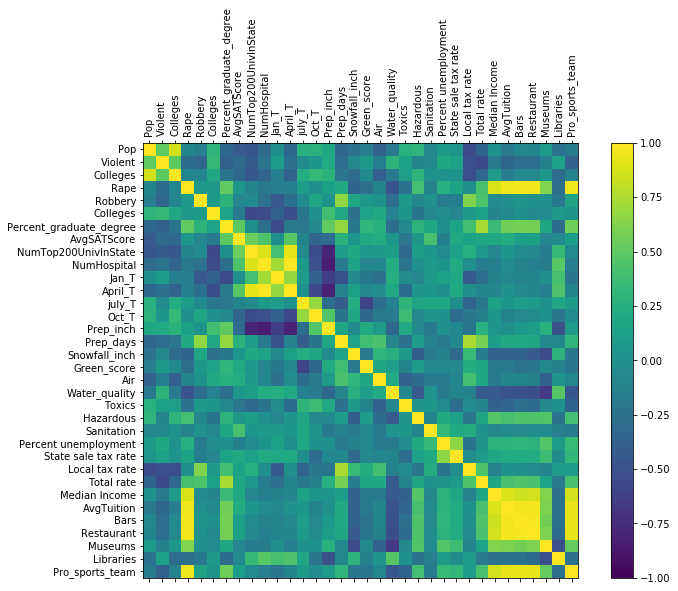

In [10]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

import data_processing as dp
(natural, human, economy, tertiary) = dp.read_data()
alldata = human
for i in[natural, economy, tertiary]:
    factors = list(i.columns.values)
    for j in factors:
        alldata[j] = i[j]

df = alldata[['Population', 'Violent', 'Rape', 'Robbery', 'Colleges',
              'Percent_graduate_degree', 'AvgSATScore', 'NumTop200UnivInState',
              'NumHospital', 'Jan_T', 'April_T', 'july_T', 'Oct_T', 'Prep_inch',
              'Prep_days', 'Snowfall_inch', 'Green_score', 'Air', 'Water_quality',
              'Toxics', 'Hazardous', 'Sanitation', 'Percent unemployment',
              'State sale tax rate', 'Local tax rate', 'Total rate', 'Median Income',
              'AvgTuition', 'Bars', 'Restaurant', 'Museums', 'Libraries',
              'Pro_sports_team', 'Park_acres_per_1000_residents', 'NumTop200Restau']]             


names = ['Pop', 'Violent', 'Colleges', 'Rape', 'Robbery', 'Colleges',
         'Percent_graduate_degree', 'AvgSATScore', 'NumTop200UnivInState',
         'NumHospital', 'Jan_T', 'April_T', 'july_T', 'Oct_T', 'Prep_inch',
         'Prep_days', 'Snowfall_inch', 'Green_score', 'Air', 'Water_quality',
         'Toxics', 'Hazardous', 'Sanitation', 'Percent unemployment',
         'State sale tax rate', 'Local tax rate', 'Total rate', 'Median Income',
         'AvgTuition', 'Bars', 'Restaurant', 'Museums', 'Libraries',
         'Pro_sports_team', 'Park_acres_per_1000_residents', 'NumTop200Restau']
data = df
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,34,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation = 'vertical')
ax.set_yticklabels(names)
plt.show()

** Based on the correlation plot, some interesting findings are found: **
1. Bars, restaurants both has positive impact on people with median income, this make sense beacause people with median income may spend more money on the entertainment place
2. Factors like toxic, hazadous materials negatively correlated with air and water quality, this is also sensible for the city with cleaner air and water quality may have less toxic and hazardous materials